In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Handling Missing Data

There are 3 mechanisms that lead to missing data:

1. <b> MCAR - missing completely at random. </b>
* As the miss is random, the probability of missing a value is the same for all observations.
* There is no relationship between the data missing and other values.
* Disregarding those values will not bias the inference. 

2. <b> MAR - missing at random </b>

The probability of an observation being missing depends on available information. For example, if a survey checks men’s and women’s weight, if women don't want to answer weight questions, whether weight is missing is dependent on the sex. If we chose to use weight in the prediction, we might include gender somehow to control the bias. 

3. <b> MNAR - missing not at random </b>

There is a reason why missing values are introduced to the dataset. It means something, it's part of the data. The missing data is related to the outcome. Its a contributing factor. 

To understand why data is missing, we need to understand how it was collected. If its possible, it helps decide how to engineer the features. 

## Cardinality


The number of different categories in a variable is the variable’s cardinality. Why is this important? 

because when a variable is highly cardinal its distribution may be uneven and cause problems. For example, if the variables are not present in the test set, the model will overfit. If it's not present in the train set, the model won’t be able to work with them. 

Variables with too many labels tend to dominate those with fewer labels, particularly in tree-based models. 

A large number of labels may introduce noise with little if any added information.

Reducing cardinality might help improve model performance. 

## Imputation

One easy method of imputing numerical missing data is using its mean or median. If the value is categorical, we might want to use its mode. 

What ever we do, we often add another column stating which parameter was transformed and which wasnt. As after the change its impossible to notice, it might be helpful for the model to know this value was "made up".

There are 2 main techniques for imputing data, statistical and arbitrary. We'll start with statistical.

#### Imputation Assumptions

1. Data is missing at random.

2. The missing observations behave the same way as the observations we do have.

### Workflow

#### Statistical Methods

We divide the data into train and test (usually something around 75%/80% train). If we also use a validation test we might want to give the training something about 65-70. 

If the data distributes normally, we can either use the mean or the median, in a normal distribution its the same. If the distribution is not normal, we use the median.

Lets say we decided to replace missing values with its mean. We calculate the train set's mean and this is the mean we use in the other datasets <b> although </b> their own mean might be different.

The reason we do this is to avoid <b> data leakage </b>

##### Data Leakage

Data leakage occurs when information from the test set leaks into the training process, leading to overly optimistic performance estimates and poor generalization to new data. Using the test set mean to impute missing values in the test set would mean that you're using information from the test set to influence your model indirectly, which is a form of data leakage.

Basically what happens is that we build a model that tries to predict some score. The model is learning the train set. The model learns that on some situations (missing data), the imputed result, is the train set's mean (for example 5) and not the test set's mean (for example 1). The conditions in which the model is trained on, are not the same in which it is tested on. Therefor the results are unreliable.

This isnt a classical data leakage in my view, as data leakage usually means the model is getting an unfair advantage by providing it information it won't be getting in evaluation, but it is SOME KIND of data leakage in the sense that it introduces inconsistency.

#### Arbitrary Methods

An arbitrary method is replacing the missing value with some arbitrary value, for example 0 or 999. We should look at the min and max range of the values and choose something very different.

The most common arbitrary technique is just creating a new category, something like “Missing”. 

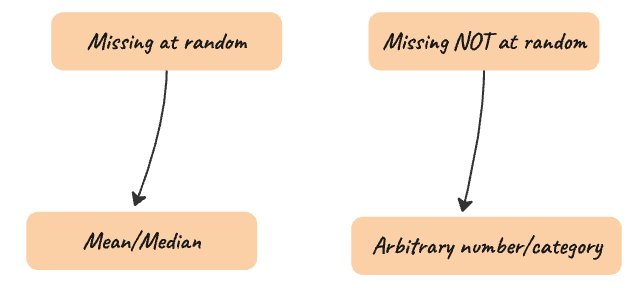

## Other Imputation Methods

<b> CCA - Complete Case Analysis </b>

Removing rows with missing data. CCA assumes the missing data is random, so it's basically like removing a random sample from the dataset. 

<b> Random Sampling Imputation </b>

Picking the imputation at random from the column.  

<b>Imputation Per Group</b>

Dividing the data into groups (for example male/female) and creating the mean for each group. When I want to add an imputation, I do it with the group’s mean. 

## Using ML to Create Imputations

<b> KNN Imputation </b>

In KNN imputation we take the k nearest neighbors and make a weighted average. The weight can either be 1 for all weights or according to Euclidean distance. The challenge is usually finding the optimal number of K. 

The authors of the paper who presented this technique say it works pretty well if the number of missing values is up to 20% and the number of K should be something between 10 and 20. That being said, the original paper was written on genes data, perhaps its not generalizable. 

# Categorical Encoding

 We are going to speak about 3 basic methods of encoding categorical variables. 

    One Hot Encoding - used when you want to use a linear model

    Ordinal/Label encoding - used when you want to use a tree-based model

    Count/frequency encoding - used in many Kaggle competitions. 

<b> One hot encoding </b>

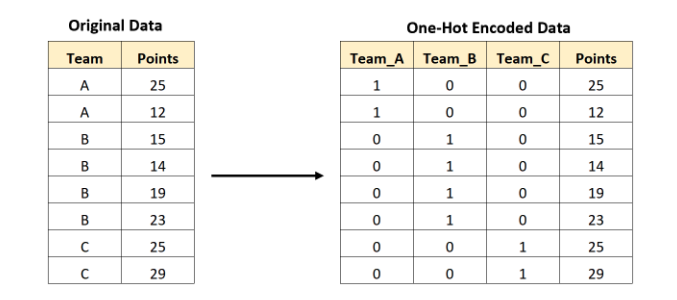

Advantages

    Makes no assumptions about the distribution

    Keeps all information of the variable

    Suitable for linear models

Disadvantages:

    Expands the feature space

    Does not add information as encoding

    Many dummy variables can be identical, introducing redundant information. 

<b> Ordinal/Label Encoding </b>

Providing categories with numbers from 1 to n. 

Advantages:

    Easy to implement

    Does not expand feature space

    Works well with tree-based algorithms. 

Disadvantages:

    Encoding doesn't add extra data

    Not suitable for linear models if the order is not meaningful

<b> Count/Frequency Encoding </b>

We count how many times each category appeared. For example, green appeared 4 times. Where every there is green, we replace it with 4. Its quite common in Kaggle competitions. 

Advantages:

    Easy to implement

    Does not expand feature space

    Works well with tree-based algorithms. 

Disadvantages:

    Not suitable for linear models

    Two variables with the same frequency will be values as the same variable. This might make us lose important information. 

## Monotonic Relationships

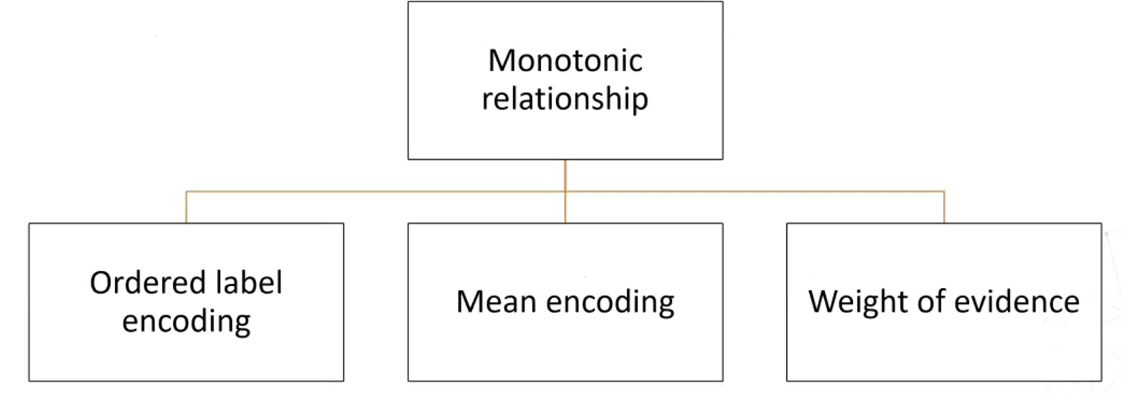

### Ordered LabeL Encoding

These methods fit a situation where there is a monotonic relationship (a.k.a correlation, either positive or negative). 

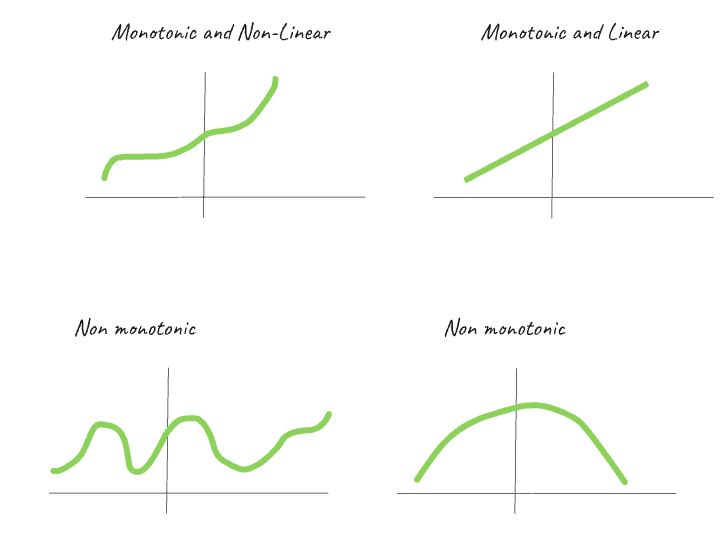

As we can see in the image, in the monotonic relationship there is a clear correlation. When one goes up, the other goes up (the correlation can also be negative). The reason the bottom images are not monotonic relationships is that as x increases, y sometimes goes up and sometimes down. 

Why do we care about monotonic encoding? because it can improve linear model efficiency. Linear models assume some linear relationships, but categorical features have no order in them. Using monotonic relationships, we can create some kind of order. It can also improve tree based models as it can create shallower trees. 

In this method we calculate the average target score for each color. For example, the mean targets for red is 0.5. The mean target for yellow is 1. The mean target for green is 3. We give yellow first place (the number 1), red the second place (the number 2) and so on

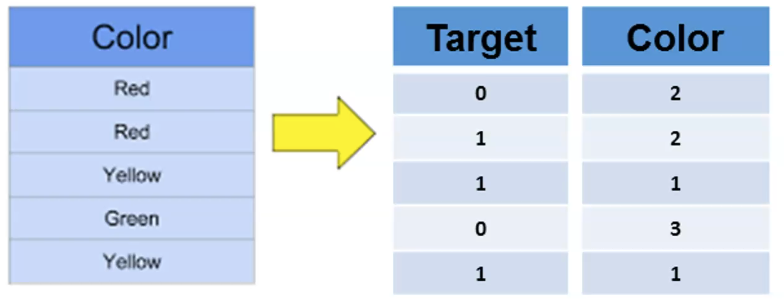

<b> Advantages </b>

    Does not expand feature space

    Creates monotonic relationships between features and target

<b> Disadvantages: </b>

    May lead to overfitting

    If two values get the same score, we need to somehow arbitrarily choose which one gets the higher number. For example, frequency in data, random, or what ever other way. 

## Mean Encoding

Same calculation of the Ordered Ordinal Encoding, but we don’t give it 1st place, 2nd place etc, we give each score its actual value. If the average is 0.5, it gets 0.5. 

## WoE - Weight of Evidence

WoE is a measure used to quantify the predictive power of a feature with respect to a binary outcome. It is used to transform categorical features into continuous values, making them suitable for use in logistic regression models.

The calculation goes like this:

1. Total number of "good" outcomes (e.g. label = 1).
2. Total number of "bad" outcomes (e.g label = 0).
3. Percentage of good and bad for each cateogry.
4. Divide percentage of good in cateogy by percentage of bad in category.
5. Take the log of the divison

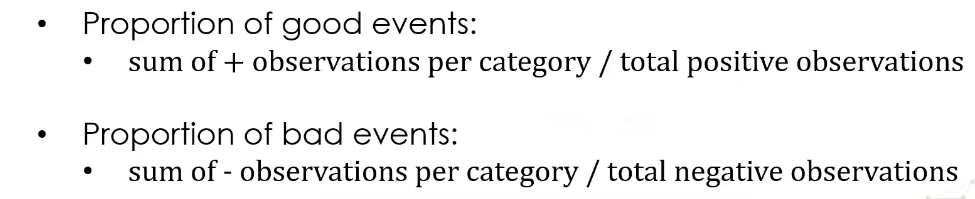

Why take the log?

1. It makes the data more linear
2. Helps mitigate the affect of extreme values

In [19]:
data = {
    'Position': ['Forward', 'Midfielder', 'Defender', 'Goalkeeper', 'Forward', 'Defender', 'Midfielder', 'Forward', 'Goalkeeper', 'Defender'],
    'Experience_Level': ['Rookie', 'Veteran', 'Intermediate', 'Veteran', 'Intermediate', 'Rookie', 'Intermediate', 'Veteran', 'Rookie', 'Intermediate'],
    'Selected': [1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

def calculate_woe(df, feature, target):
    df_woe = df.groupby(feature)[target].agg(['count', 'sum'])
    df_woe['non_event'] = df_woe['count'] - df_woe['sum']
    df_woe['event_rate'] = df_woe['sum'] / df_woe['sum'].sum()
    df_woe['non_event_rate'] = df_woe['non_event'] / df_woe['non_event'].sum()
    df_woe['woe'] = np.log(df_woe['event_rate'] / df_woe['non_event_rate'])
    return df_woe[['woe']].to_dict()['woe']

woe_position = calculate_woe(df, 'Position', 'Selected')
print("WoE for Position:\n", woe_position)

woe_experience = calculate_woe(df, 'Experience_Level', 'Selected')
print("WoE for Experience_Level:\n", woe_experience)

df['Position_WoE'] = df['Position'].map(woe_position)
df['Experience_WoE'] = df['Experience_Level'].map(woe_experience)

WoE for Position:
 {'Defender': -1.0986122886681098, 'Forward': inf, 'Goalkeeper': -0.40546510810816444, 'Midfielder': -0.40546510810816444}
WoE for Experience_Level:
 {'Intermediate': 0.6931471805599453, 'Rookie': -1.0986122886681098, 'Veteran': 0.28768207245178085}


In [20]:
df

,Position,Experience_Level,Selected,Position_WoE,Experience_WoE
0,Forward,Rookie,1,inf,-1.098612
1,Midfielder,Veteran,0,-0.405465,0.287682
2,Defender,Intermediate,0,-1.098612,0.693147
3,Goalkeeper,Veteran,1,-0.405465,0.287682
4,Forward,Intermediate,1,inf,0.693147
5,Defender,Rookie,0,-1.098612,-1.098612
6,Midfielder,Intermediate,1,-0.405465,0.693147
7,Forward,Veteran,1,inf,0.287682
8,Goalkeeper,Rookie,0,-0.405465,-1.098612
9,Defender,Intermediate,1,-1.098612,0.693147


Advantages

    Creates a monotonic relationship between the target and features

    Orders the categories on a logistic scale which is good for logistic regression

    The transformed features can be compared as they are on the same scale

Disadvantages:

    May lead to overfitting

    There is a problem where the good or bad events are 0. We then need another method like taking the mean (of all other features) or something. 

# Categorical Encoding - Rare Labels

<b> Rare Labels </b>

Basically, rare labels are unreliable. We have two ways of dealing with them which have the same result:

    Grouping all of them to “rare” label. 

    One hot encoding of the frequent categories. Let’s say we have 3 common labels and 5 very rare ones. We one hot encode the 3 most common. Then if we have zero for all the labels, we conclude the label is “rare”.

# Variable Transformations

Linear models hold quite a lot of assumptions. If those are not met, the model sucks. To mitigate this, we can sometimes transform the parameters, either dependent or independent. We only need to do that when we train linear models. Models like tree-based and nearest neighbors are not linear and hence do not require that. 

We are going to talk about 5 variable transformations.

## Logaritmic Transformation

Linearization: Log transformations often convert nonlinear relationships into linear ones. For example, if you have an exponential relationship between two variables, taking the log of one of them can make the relationship linear. This makes it easier to model and interpret with linear techniques.


Scale Adjustment: It compresses large values and expands small values, which can make patterns more apparent and reduce the impact of outliers.

Very good for positive data which is right-skewed (observations’ values become lower and lower as the x-axis continues). The formula is x_new = log(x)

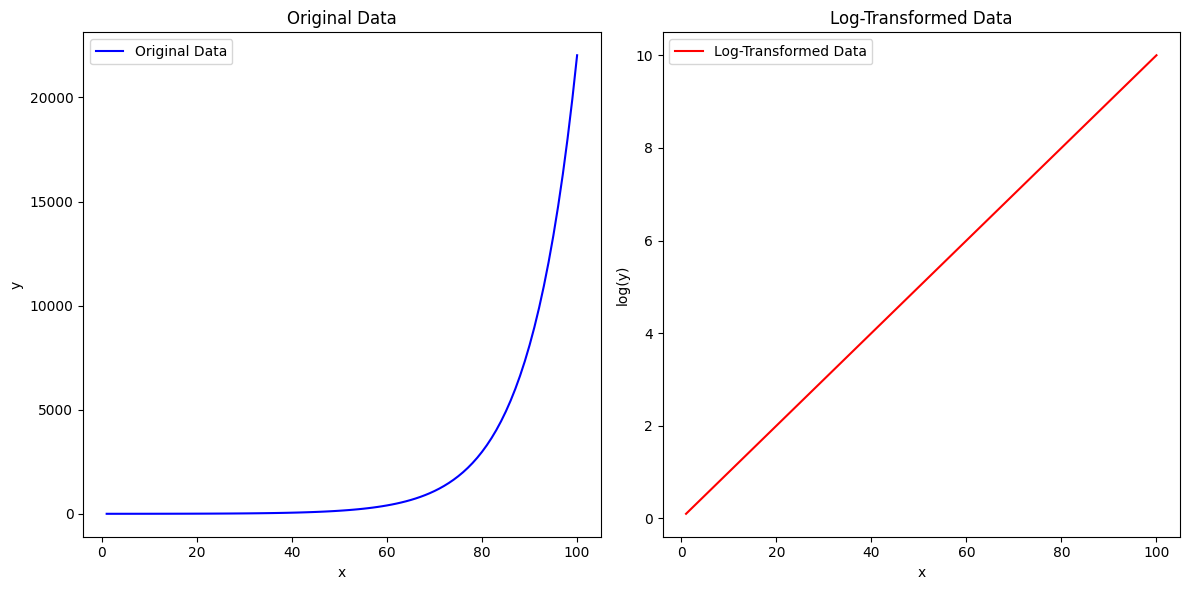

In [24]:
x = np.linspace(1, 100, 100)  # Avoid zero as log(0) is undefined
y = np.exp(x / 10) 

y_log = np.log(y)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label='Original Data', color='blue')
plt.title('Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y_log, label='Log-Transformed Data', color='red')
plt.title('Log-Transformed Data')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
min(y), max(y)

(1.1051709180756477, 22026.465794806718)

In [50]:
min(y_log), max(y_log)

(0.10000000000000007, 10.0)

In [52]:
np.random.seed(0)
data_skewed = np.random.exponential(scale=1.0, size=1000)

data_log_transformed = np.log(data_skewed + 1e-6)  # Adding a small constant

In [54]:
min(data_skewed), max(data_skewed)

(0.0005461139900989002, 8.56103075405615)

In [55]:
min(data_log_transformed), max(data_log_transformed)

(-7.510853385847098, 2.1472207149061564)

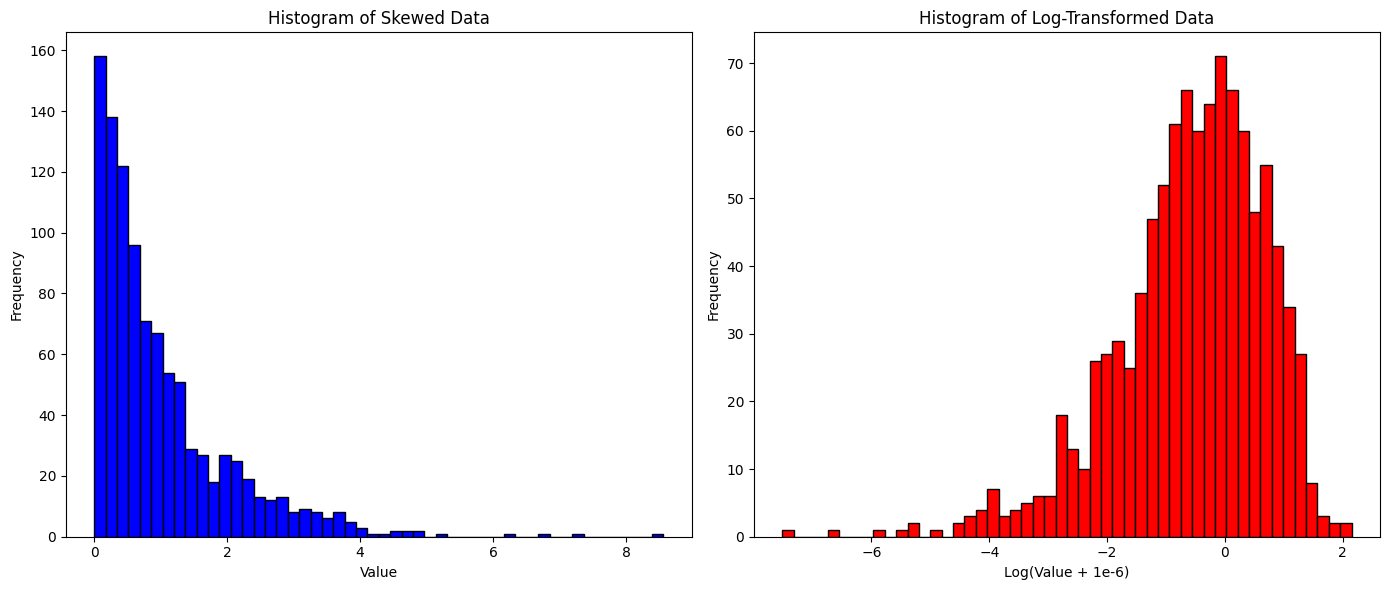

In [53]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data_skewed, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Skewed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data_log_transformed, bins=50, color='red', edgecolor='black')
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log(Value + 1e-6)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Reciprocal

Handling Exponential Growth: If the data shows exponential growth, using the reciprocal transformation can sometimes linearize the data, making it more amenable to linear regression techniques.

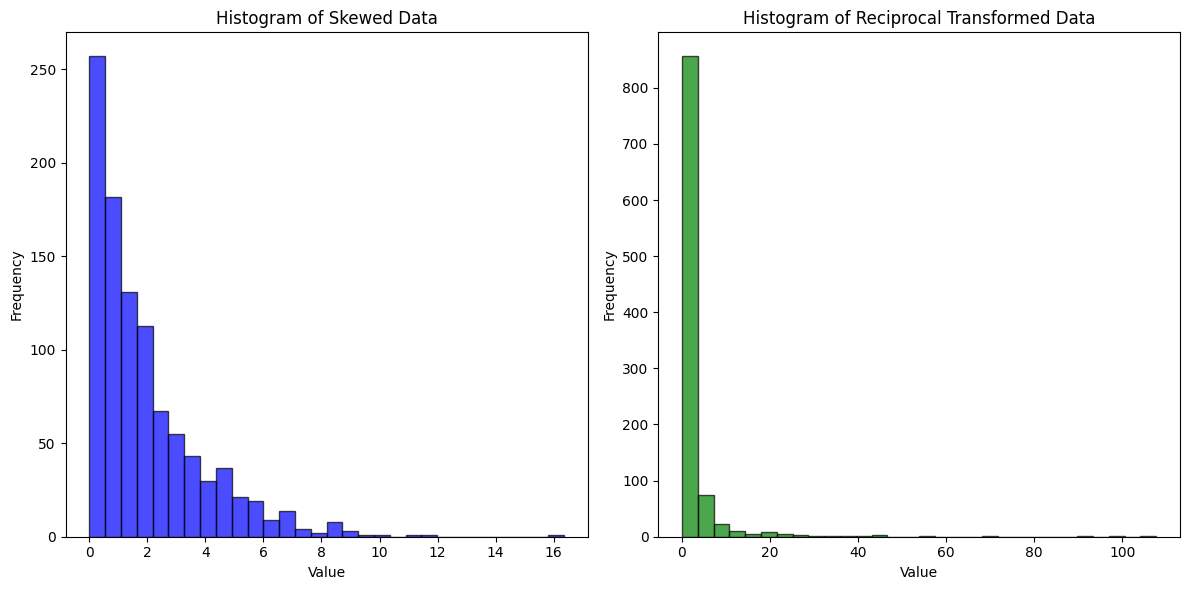

In [59]:
np.random.seed(42)
skewed_data = np.random.exponential(scale=2, size=1000)
skewed_data_nonzero = skewed_data[skewed_data > 0]
transformed_data = 1 / skewed_data_nonzero

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(skewed_data_nonzero, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Skewed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Reciprocal Transformed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Square Root

Suitable for variables of a Poisson distribution (how many events will happen in a given time, assuming the events are independent).

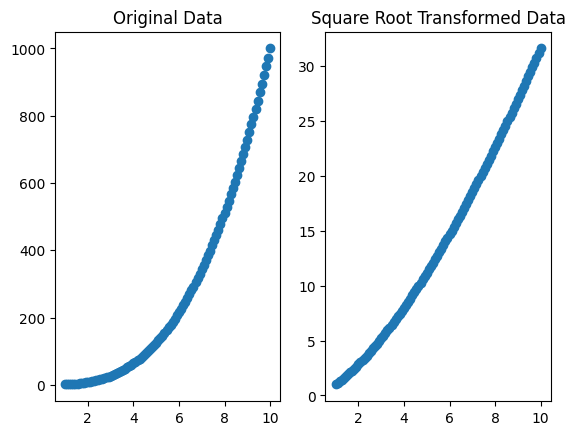

In [65]:
x = np.linspace(1, 10, 100)
y = x ** 3

plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.title('Original Data')

y_sqrt = np.sqrt(y)

plt.subplot(1, 2, 2)
plt.scatter(x, y_sqrt)
plt.title('Square Root Transformed Data')

plt.show()


## Arcsin

Mostly good for data that is between 0 and 1 (probabilities, percentages, proportions), etc.

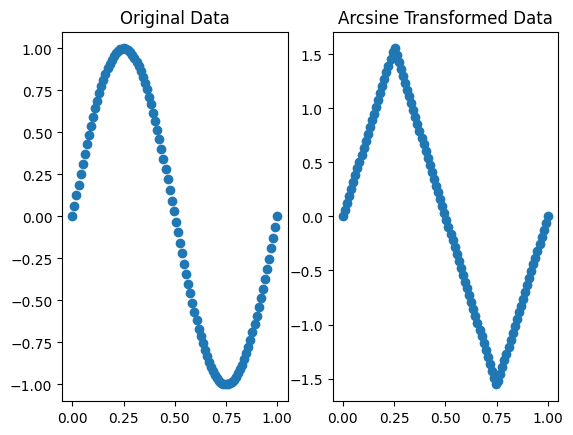

In [63]:
x = np.linspace(0, 1, 100)
y = np.sin(2 * np.pi * x)

plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.title('Original Data')

y_arcsin = np.arcsin(y)

plt.subplot(1, 2, 2)
plt.scatter(x, y_arcsin)
plt.title('Arcsine Transformed Data')

plt.show()


## Power

Power - Raising the variables by some power. Usually, if the numbers are right-skewed (e.g. most of the numbers are in the low range, in the left side of the X axis) we use a power <1. If the numbers are left skewed, most of the numbers are big, then we use a power of > 1. This power should be learnable.

In [22]:
data = np.random.lognormal(mean=0, sigma=1, size=1000)

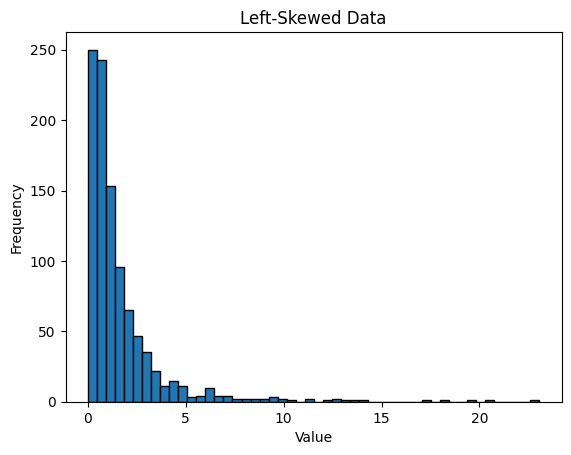

In [23]:
left_skewed_data = 1 / (data + 1e-9)  # Adding a small constant to avoid division by zero

plt.hist(left_skewed_data, bins=50, edgecolor='k')
plt.title('Left-Skewed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Text(0.5, 1.0, 'Right Skewed Data')

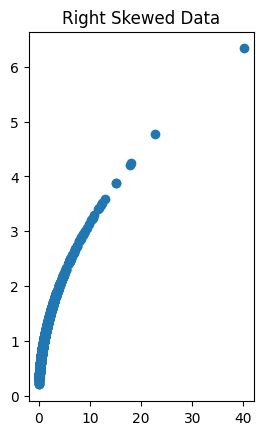

In [24]:
x = np.linspace(0.1, 10, 100)
right_skewed = np.power(data, 0.5)  # Power < 1, right-skewed

plt.subplot(1, 2, 1)
plt.scatter(data, right_skewed)
plt.title('Right Skewed Data')

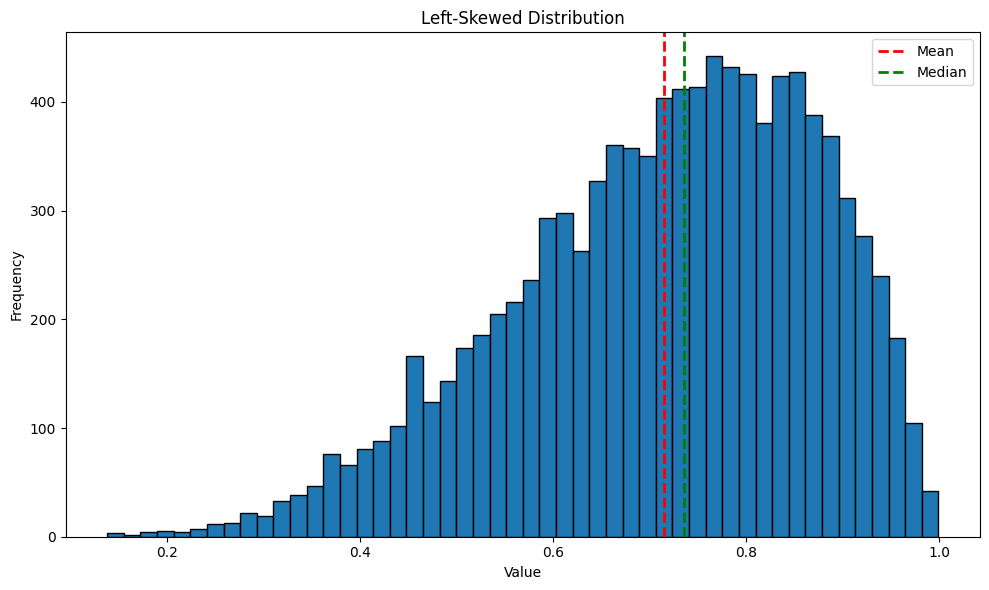

In [25]:
np.random.seed(42)

data = np.random.beta(5, 2, 10000)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, edgecolor='black')
plt.title('Left-Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.axvline(data.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

plt.axvline(np.median(data), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Right Skewed Data')

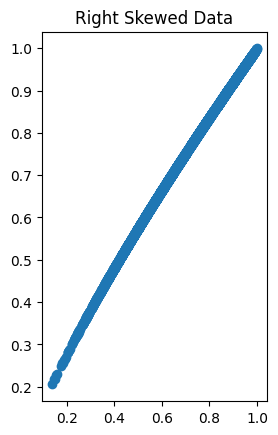

In [27]:
x = np.linspace(0.1, 10, 100)
right_skewed = np.power(data, 0.8) 

plt.subplot(1, 2, 1)
plt.scatter(data, right_skewed)
plt.title('Right Skewed Data')

# Handling Outliers

How do we spot outliers?

In a normal distribution, 99% of the observations lie within +-3 standard deviations from the mean. 

A better way of spotting outliers is calculating the <b> inter-quantile range </b>

We calculate the IQR. We then use it to find an upper and lower limit. Anything above the upper limit or below the lower limit, is considered an outlier.

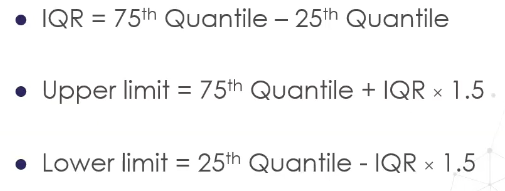

In [13]:
data = {'values': [-5, 10, 12, 14, 15, 18, 19, 19, 21, 22, 25, 30, 35, 100]}
df = pd.DataFrame(data)

Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)

IQR = Q3 - Q1

In [14]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
outliers = df[(df['values'] < lower_bound) | (df['values'] > upper_bound)]

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Q1: 14.25
Q3: 24.25
IQR: 10.0
Lower bound: -0.75
Upper bound: 39.25


In [16]:
outliers

,values
0,-5
13,100


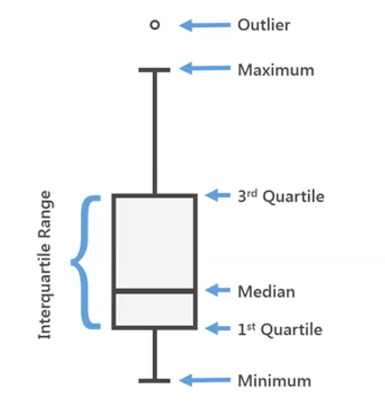

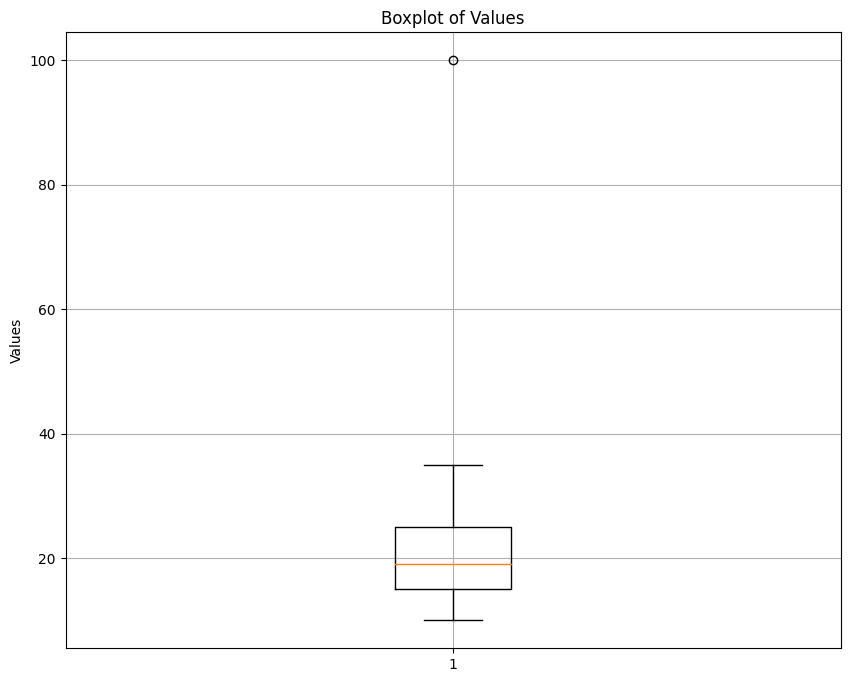

In [8]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['values'], vert=True)
plt.title('Boxplot of Values')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Feature Scaling

<b> What is Feature Scaling? </b>

Feature scaling is a technique to standardize the range of independent variables or features of data. In machine learning, this ensures that each feature contributes equally to the model's performance.

In [ ]:
def return_splitted_wine_dataset():
    
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    wine = pd.read_csv(url, sep=";")

    X = wine.drop("quality", axis=1)
    y = wine["quality"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = return_splitted_wine_dataset()

knn_original = KNeighborsRegressor(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)

mse_original = mean_squared_error(y_test, y_pred_original)
r2_original = r2_score(y_test, y_pred_original)

print("\nPerformance of KNN on Original Data:")
print(f"Mean Squared Error: {mse_original:.2f}")
print(f"R^2 Score: {r2_original:.2f}")

In [86]:
def return_standardized_prediction(feature_scaling_method: str):
    
    X_train, X_test, y_train, y_test = return_splitted_wine_dataset()
    
    scaler = None
    
    if feature_scaling_method == 'min_max':
        scaler = MinMaxScaler()
        
    elif feature_scaling_method == 'standardize':
        scaler = StandardScaler()
        
    else:
        raise Exception('please choose a valid feature_scaling_method')
        
    
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    knn_normalized = KNeighborsRegressor(n_neighbors=5)
    knn_normalized.fit(X_train_normalized, y_train)
    y_pred_normalized = knn_normalized.predict(X_test_normalized)

    mse_normalized = mean_squared_error(y_test, y_pred_normalized)

    print(f"Mean Squared Error: {mse_normalized:.2f}")

## Min-Max Normalization

In [78]:
data = np.array([10, 20, 30, 40, 50])

normalized_data = (data - data.min()) / (data.max() - data.min())

print("Original data:", data)
print("Normalized data:", normalized_data)

Original data: [10 20 30 40 50]
Normalized data: [0.   0.25 0.5  0.75 1.  ]


In [83]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

knn_normalized = KNeighborsRegressor(n_neighbors=5)
knn_normalized.fit(X_train_normalized, y_train)
y_pred_normalized = knn_normalized.predict(X_test_normalized)

mse_normalized = mean_squared_error(y_test, y_pred_normalized)
r2_normalized = r2_score(y_test, y_pred_normalized)

print(f"Mean Squared Error: {mse_normalized:.2f}")

Mean Squared Error: 0.46


## Standardization

In [88]:
data = np.array([[1, 2, 3], 
                 [4, 5, 6], 
                 [7, 8, 9], 
                 [10, 11, 12]])

mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standardized_data_manual = (data - mean) / std_dev

In [89]:
return_standardized_prediction('standardize')

Mean Squared Error: 0.45


# Engineering Time Variables

In [90]:
from datetime import datetime

now = datetime.now()
time_string = now.strftime("%Y-%m-%d %H:%M:%S")
print(time_string)

2024-07-17 10:15:09


What features can I extract from such a date?

1. Day of week.
2. Is it a holiday.
3. Is it salary day?
4. What season is it? 
5. Is it close to a meaningful day?
6. Is it still business hours?
7. Is the sun still shining by that time?

## Exercise

Take the AirBnB dataset you just worked on and see what you can improve using this new techniques. For example, are there any hidden insights in the date? feature engineer it (and what ever else you see fit) to create new date related features.